# V2
# Autoencoder for image compression using Deep learning

<img src="https://www.oscprofessionals.com/wp-content/uploads/2019/11/lossless-compression-banner-2.jpg" height="100px" width="100%">

In [1]:
# to subpress warning
import warnings
warnings.filterwarnings("ignore")

try:
    #importing librarys

    # cv2 is a python extarnal package to do image processing and manipulation related stuff.
    import cv2 

    # imutils is a series of convenience functions to make basic image processing easy.
    import imutils

    # tensorflow is a python library for machine learning and artificial intelligence related work.
    import tensorflow as tf 


    # NumPy is a Python library used for working with arrays
    import numpy as np
    
    # pandas offers data structures and operations for manipulating numerical tables and time series.
    import pandas as pd

    # Keras is a library that provides a Python interface for artificial neural networks. 
    # Keras acts as an interface for the TensorFlow library.
    import keras


    # 1. Keras layers are the building blocks of the Keras library that can be stacked together for creating neural network models.
    # 2. Keras Conv2D creates a 2D convolution kernel that is wind with layers input which helps produce a tensor of outputs.
    # 3. maxpooling2D Downsamples the input along its spatial dimensions by taking the maximum value over an input window for each channel of the input. 
    # 4 .Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
    # 5 .Dropout regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data.
    # 6. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. 
    from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


    #  Model groups layers into an object with training and inference features.
    from tensorflow.keras.models import Model

    # tensorflow.keras.callbacks is used to visualize training of a model.
    from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint 

    # used to split dataset(features and target) into test and test
    from sklearn.model_selection import train_test_split

    # F1/F Score is a measure of how accurate a model is by using Precision and Recall following the 
    # formula of: F1_Score = 2 * ((Precision * Recall) / (Precision + Recall)) 
    # Precision is commonly called positive predictive value.
    from sklearn.metrics import f1_score

    # shuffle the dataset for a even mixture of each type of feature and target.it gives better result.
    from sklearn.utils import shuffle

    # A one hot encoding allows the representation of categorical data to be more expressive.
    from sklearn.preprocessing import OneHotEncoder

    # confusion matrix is used to evaluate the accuracy of a classification.[[TP,FP],[FN,TN]]
    # A classification report is a performance evaluation metric in machine learning. 
    # It is used to show the precision, recall, F1 Score, and support of your trained classification model.
    from sklearn.metrics import confusion_matrix,classification_report

    # importing prebuild structure similarity index 
    from skimage.metrics import structural_similarity as SSIM
    
    # The OS module in Python provides functions for interacting with the operating system.
    import os

    # Matplotlib is a data visualization and graphical plotting library for Python.
    import matplotlib.pyplot as plt

    # seaborn is alse a data visualization and graphical plotting library for Python.
    import seaborn as sn

    # used to display markdown,image,control (frontend utilities)
    from IPython import display

    import time
    # time package
    
    from math import log10, sqrt
    # for mathematical operations
    
    import random
    
    
except:
    !pip install -r requirements.txt
# dataset path 
path = r"DATASET"
# make sure in this dir two folder named "yes" and "no" is present. 

In [2]:
# GPU Info 
try:
    import GPUtil
except:
    !pip install GPUtil
    import GPUtil

    
# check physical computing devices
device=tf.config.experimental.list_physical_devices()
for i in device:
    print(i)
if len(device)>1:
    # find GPU details
    print("="*20, "GPU Details", "="*20)
    gpus = GPUtil.getGPUs()
    for gpu in gpus:
        print(gpu_id,gpu.name, gpu.driver,gpu.memoryTotal,gpu.temperature)



PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [3]:
# this function crop out the unnecessary part of a image.
# it takes two parameter -> image : numpy/cv2 image array , plot : binary (You want to plot after before effect of the image)


def image_threshholder(image, plot=False):
    # grayscalling the image
    # applying gausionBlur operation on grayscaled image.
    # binary threshholding the image to clean the gray scale range and makes the image binary colored based on range.
    # to remove thresh holding comment the next line
    grayscale=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred=cv2.GaussianBlur(grayscale,(5,5),0)
    new_image= cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY,cv2.CHAIN_APPROX_SIMPLE)[1]
    if plot:
        # plots the after before effect on the image based on parameter plot
        # plot if plot=true, ignore the if block if plot=False
        plt.figure()
        plt.figure(figsize=(12, 7))
        plt.subplot(1,4,1)
        plt.imshow(image)
        plt.tick_params(axis="both", which="both",
                        top=False,bottom=False,left=False,right=False,
                       labelbottom=False,labeltop=False,labelleft=False,
                       labelright=False)
        plt.title("(a)")
        
        plt.subplot(1,4,2)
        plt.imshow(grayscale,cmap='gray')
        plt.tick_params(axis="both", which="both",
                        top=False,bottom=False,left=False,right=False,
                       labelbottom=False,labeltop=False,labelleft=False,
                       labelright=False)
        plt.title("(b)")
        
        plt.subplot(1,4,3)
        plt.imshow(blurred,cmap='gray')
        plt.tick_params(axis="both", which="both",
                        top=False,bottom=False,left=False,right=False,
                       labelbottom=False,labeltop=False,labelleft=False,
                       labelright=False)
        plt.title("(c)")
        
        
        
        
        plt.subplot(1,4,4)
        plt.imshow(new_image,cmap="gray")
        plt.tick_params(axis="both", which="both",
                        top=False,bottom=False,left=False,right=False,
                       labelbottom=False,labeltop=False,labelleft=False,
                       labelright=False)
        plt.title("(d)")
        plt.show()
        
    return new_image

<Figure size 432x288 with 0 Axes>

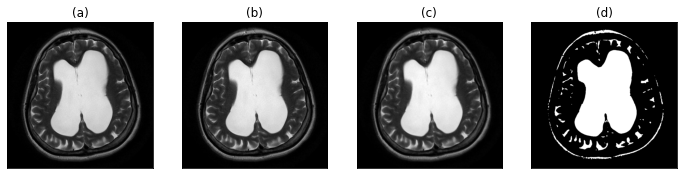

In [4]:
# testing the crop_contour_brain_img() function
example_image=cv2.imread(path+"/4.jpg")
img=image_threshholder(example_image,True)
# plt.imshow(img)
print()

In [5]:
# view directory tree
def tree_printer(root):
    try:
        if ":" not in root:
            root=os.getcwd().replace("\\","/")+"/"+root
            print(root)
        if not os.path.isdir(root) and root!="":
            print(root,": path not exists....")
            return
    except:
        print("🛠️ set path of the data set from your local mechine")
        return
    
    
    print("🗁",root,"-->",len(os.listdir(os.path.join(root))), "Items present.")
    for name in os.listdir(root):
        try:
            print(" |- 🗁",name," "*2+"🏴",len(os.listdir(os.path.join(root, name))),"items")
        except:
            continue
            
tree_printer(path)

C:/Users/TIRTHA/jupyterProjects/Autoencoder_for_image_Compression/DATASET
🗁 C:/Users/TIRTHA/jupyterProjects/Autoencoder_for_image_Compression/DATASET --> 132 Items present.


In [6]:
image_size=(64,64) # defining the image size 
hotencoder = OneHotEncoder() # calling the OneHotEncoder
hotencoder.fit([[0], [1]]) # using binary crossentropy over catagorical crossentropy



# load the images from the local mechine and process before putting the resultent list.
def load_images(path,type=["jpg","jpeg"],orgimages=[]):
    for filepath in os.listdir(path):
        if filepath.split(".")[-1].lower() in type:
            
            img=cv2.imread(path+"/"+filepath)
               
            
            try:
                # filtering the image
                img=image_threshholder(img)
                # resizing the image in defined size
                img=cv2.resize(img,image_size)
            except:
                print("Excluded image :",path+"/"+filepath)
                continue
            
            
            # 3d image to 2D
            img = np.expand_dims(img, 2)
            orgimg=np.reshape(img,image_size)

            # pushing prepared data to list
            orgimages.append(orgimg)
            
            
    return orgimages

# plot images 
def show_image(datasets,num=4):  
    for i in range(num**2):
        plt.subplot(num, num, i+1)
        plt.imshow(datasets[i],cmap="gray")
        plt.axis('off')


Excluded image : DATASET/46.jpg
Excluded image : DATASET/58.jpg
Wall time: 1.27 s


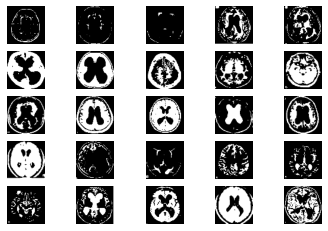

In [7]:
%%time
# load the image having brain cancer
orgimages=load_images(path,orgimages=[])
# print(images.shape)
show_image(orgimages,num=5)
# print(result)


In [8]:
# checking the dimention of the processed data
orgdata=np.array(orgimages)
print(orgdata.shape)

(130, 64, 64)


## custom test-train splitter

In [73]:
# customized test train splitter

def test_train_splitter(data,ratio=0.2):
    range=int(data.shape[0]*(1-0.2))
    x_train=data[:range]
    x_test=data[range:]
    np.random.shuffle(x_train)
    np.random.shuffle(x_test)
    return x_train,x_test


# model starts here -----------:)

In [74]:
# importing necessary packages
# view explanation in 2nd cell
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets

## encoder model

In [75]:
# encoder model func
# encoder takes image(4096bit) input of size 64X64
# encode the image in 64bit image(8X8)
def get_encoder():
    # Encoder input shape (4096,)
    x = tensorflow.keras.layers.Input(shape=(64,64), name="encoder_input")
    
    # flattening the data
    flat_x=tf.keras.layers.Flatten()(x)
    
    # scalling the data between 0..1
    scaled_x=tf.keras.layers.Rescaling(1./255)(flat_x)
    
    # neurons in a Dense layer is now 2048 
    encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=2048, name="encoder_dense_1")(scaled_x)
    encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

    # neurons in a Dense layer is decreased to 1024
    encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=1024, name="encoder_dense_2")(encoder_activ_layer1)
    encoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_2")(encoder_dense_layer2)
    
    # neurons in a Dense layer is decreased to 512
    encoder_dense_layer3 = tensorflow.keras.layers.Dense(units=512, name="encoder_dense_3")(encoder_activ_layer2)
    encoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_3")(encoder_dense_layer3)
    
    # neurons in a Dense layer is decreased to 256
    encoder_dense_layer4 = tensorflow.keras.layers.Dense(units=256, name="encoder_dense_4")(encoder_activ_layer3)
    encoder_activ_layer4 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_4")(encoder_dense_layer4)
    
    # neurons in a Dense layer is decreased to 64
    encoder_dense_layer5 = tensorflow.keras.layers.Dense(units=64, name="encoder_dense_5")(encoder_activ_layer4)
    encoder_activ_layer5 = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer5)

    # containerized the model
    encoder = tensorflow.keras.models.Model(x, encoder_activ_layer5, name="encoder_model")
    return encoder

encoder=get_encoder()
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 rescaling_1 (Rescaling)     (None, 4096)              0         
                                                                 
 encoder_dense_1 (Dense)     (None, 2048)              8390656   
                                                                 
 encoder_leakyrelu_1 (LeakyR  (None, 2048)             0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 1024)              2098176   
                                                     

## decoder model

In [76]:
# decoder model func
# encode the encoded image(64bit) back to original size(4096 bit).

def get_decoder():
    decoder_input = tensorflow.keras.layers.Input(shape=(64), name="decoder_input")

    # neurons in a Dense layer is now 256
    decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=256, name="encoder_dense_1")(decoder_input)
    decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

    # neurons in a Dense layer is decreased to 512
    decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=512, name="encoder_dense_2")(decoder_activ_layer1)
    decoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_dense_layer2)
    
    # neurons in a Dense layer is decreased to 1024
    decoder_dense_layer3 = tensorflow.keras.layers.Dense(units=1024, name="encoder_dense_3")(decoder_activ_layer2)
    decoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_dense_layer3)
    
    # neurons in a Dense layer is decreased to 2048
    decoder_dense_layer4 = tensorflow.keras.layers.Dense(units=2048, name="encoder_dense_4")(decoder_activ_layer3)
    decoder_activ_layer4 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_4")(decoder_dense_layer4)
    
    # neurons in a Dense layer is decreased to 4096
    decoder_dense_layer5 = tensorflow.keras.layers.Dense(units=4096, name="decoder_dense_5")(decoder_activ_layer4)
    decoder_activ_layer5 = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer5)
    
    # reshaped the image to 64X64
    decoder_output=tf.keras.layers.Reshape((64,64), input_shape=(4096,))(decoder_activ_layer5)
    
    decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
    
    return decoder

decoder=get_decoder()
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 64)]              0         
                                                                 
 encoder_dense_1 (Dense)     (None, 256)               16640     
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 256)              0         
 eLU)                                                            
                                                                 
 encoder_dense_2 (Dense)     (None, 512)               131584    
                                                                 
 decoder_leakyrelu_2 (LeakyR  (None, 512)              0         
 eLU)                                                            
                                                                 
 encoder_dense_3 (Dense)     (None, 1024)            

## autoencoder model

In [77]:
# Autoencoder model
# combine and sync the encoder and decoder model.
# parameter encoder model and decoder model.

def autoencoder(encoder,decoder):
    ae_input = tensorflow.keras.layers.Input(shape=(64,64), name="AE_input")
    
    # encoding the input images
    ae_encoder_output = encoder(ae_input)
    # decoding the encoded image back to original shape
    ae_decoder_output = decoder(ae_encoder_output)

    
    
    ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
    return ae


ae=autoencoder(encoder,decoder)
ae.summary()

    



Model: "AE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 AE_input (InputLayer)       [(None, 64, 64)]          0         
                                                                 
 encoder_model (Functional)  (None, 64)                11161408  
                                                                 
 decoder_model (Functional)  (None, 64, 64)            11165440  
                                                                 
Total params: 22,326,848
Trainable params: 22,326,848
Non-trainable params: 0
_________________________________________________________________


In [78]:
# calculating RMSE of autoencoder
# RMSE is a measure of how spread out these residuals are. 
# It tells you how concentrated the data is around the line of best fit. 
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

# AE Compilation
ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005))



In [79]:
# preparing brain tumor dataset spliting into test train default ratio is 0.2

x_train_org,x_test_org=test_train_splitter(orgdata)
print(x_train_org.shape,x_test_org.shape)



(104, 64, 64) (26, 64, 64)


In [80]:
%%time

# Training Autoencoder
ae.fit(x_train_org, x_train_org, epochs=50, batch_size=10, shuffle=False, validation_data=(x_test_org, x_test_org))


Epoch 1/50
11/11 [==============================] - 9s 359ms/step - loss: 12944.3916 - val_loss: 9229.9883
Epoch 2/50
11/11 [==============================] - 2s 196ms/step - loss: 9319.9277 - val_loss: 9526.6055
Epoch 3/50
11/11 [==============================] - 2s 196ms/step - loss: 9025.2744 - val_loss: 8844.0039
Epoch 4/50
11/11 [==============================] - 2s 191ms/step - loss: 8791.6191 - val_loss: 9056.6973
Epoch 5/50
11/11 [==============================] - 2s 194ms/step - loss: 8805.6475 - val_loss: 8743.7979
Epoch 6/50
11/11 [==============================] - 2s 192ms/step - loss: 8764.1152 - val_loss: 9063.1289
Epoch 7/50
11/11 [==============================] - 2s 199ms/step - loss: 8805.4482 - val_loss: 8692.3643
Epoch 8/50
11/11 [==============================] - 2s 202ms/step - loss: 8735.1738 - val_loss: 8655.8037
Epoch 9/50
11/11 [==============================] - 2s 200ms/step - loss: 8085.7100 - val_loss: 7460.4771
Epoch 10/50
11/11 [==========================

In [17]:
%%time



start_time = time.time()

encoded_images = encoder.predict(x_test_org)
encode_time=time.time() - start_time
decoded_images = decoder.predict(encoded_images)
# calculating execution time
execution_time=time.time() - start_time
decode_time=execution_time-encode_time


# decoder original image resolution
org_res=(decoded_images.shape[0], 64, 64)



# reshaping the image of (4096,) to plotable image(64,64)
decoded_images_orig = np.reshape(decoded_images, newshape=org_res)
decoded_images_orig.shape

Wall time: 1.27 s


(26, 64, 64)

In [18]:
# calculating RMSE of the trained model
rmse_ae=rmse(x_test_org,decoded_images)
print(rmse_ae)

tf.Tensor(5985.12, shape=(), dtype=float32)


encoder image shape (64,)
decoder image shape (64, 64)


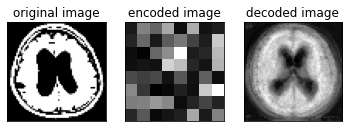

In [19]:
print("encoder image shape",encoded_images[0].shape)
print("decoder image shape",decoded_images[0].shape)

# ploting the comparition between original,encoded and decoded image.

plt.figure()
plt.subplot(1,3,1)
sample_id=1


original_sample=x_test_org[sample_id]
plt.imshow(original_sample,cmap="gray")
plt.tick_params(axis="both", which="both",
                top=False,bottom=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,
                labelright=False)
plt.title("original image")
        
plt.subplot(1,3,2)
encoded_samples=np.reshape(encoded_images, newshape=(decoded_images.shape[0], 8, 8))
encoded_sample = encoded_samples[sample_id]
plt.imshow(encoded_sample,cmap="gray")
plt.tick_params(axis="both", which="both",
                top=False,bottom=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,
                labelright=False)
plt.title("encoded image")

plt.subplot(1,3,3)
decoded_sample=decoded_images_orig[sample_id]
plt.imshow(decoded_sample,cmap="gray")
plt.tick_params(axis="both", which="both",
                top=False,bottom=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,
                labelright=False)
plt.title("decoded image")
plt.show()


### performance parameter
1. execution time
2. compression ratio
3. space saving
4. Bits per pixel (BPP)
5. Mean squared error (MSE)
6. Structure Similarity Index (SSIM)
7. Peak Signal to Noise Ratio (PSNR)
8. Percent rate of distortion (PRD)
9. Structural Content (SC)
10. Correlation Coefficient (CC)

In [20]:
# avg execution time=total execution time/no of testing sample
print("Total execution time = {} seconds".format(execution_time))
print("Avarage Execution time = {} MilliSeconds".format(execution_time/encoded_images.shape[0]*1000))

print("Total encoding time = {} seconds".format(encode_time))
print("Avarage Encoding time = {} MilliSeconds".format(encode_time/encoded_images.shape[0]*1000))

print("Total decode Time = {} seconds".format(decode_time))
print("Avarage Decoding time = {} MilliSeconds".format(decode_time/encoded_images.shape[0]*1000))

print()




def performance_param_generator(encoded_sample,original_sample,imgnum="test"):
    if os.path.isdir(r"static"):
        os.system("rm -r static")
    os.system("mkdir static")
    
    # convert 2D image to 3D
    orgToSave=cv2.cvtColor(original_sample, cv2.COLOR_GRAY2RGB)
    
    # saving the image .jpg format.
    cv2.imwrite('static/comp_sample_'+str(imgnum)+'.jpg',encoded_sample)
    cv2.imwrite('static/org_sample_'+str(imgnum)+'.jpg',orgToSave)
    
    # getting the size of the image
    size_bytes_comp = os.path.getsize('static/comp_sample_'+str(imgnum)+'.jpg')
    size_bytes_org = os.path.getsize('static/org_sample_'+str(imgnum)+'.jpg')
    
    # number of pixel in compressed image for image sample 0
    comp_pixel=encoded_sample.shape[0]
    
    # converting the bytes to bit by multiplying by 8
    size_bits_comp=size_bytes_comp*8
    size_bits_org=size_bytes_org*8

    # Bits Per Pixel (BPP): BPP is defined as the ratio of the total size of the compressed image to the total number 
    # of the pixel in the image.
    BPP=size_bits_comp/comp_pixel


    # compression_ratio = orizinal image size / compressed image size
    compression_ratio=round(size_bits_org / size_bits_comp,3)


    # defined as the reduction in size relative to the uncompressed size:
    space_saving=round(1-(1/compression_ratio),2)

    
    return compression_ratio,BPP,space_saving,size_bits_comp,size_bits_org




Total execution time = 1.268388032913208 seconds
Avarage Execution time = 48.78415511204646 MilliSeconds
Total encoding time = 0.6775722503662109 seconds
Avarage Encoding time = 26.06047116793119 MilliSeconds
Total decode Time = 0.5908157825469971 seconds
Avarage Decoding time = 22.723683944115272 MilliSeconds



In [21]:
# Mean Square Error (MSE): MSE is the description of the cumulative squared error between the 
# compressed image and the original image
def MSE(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return round(err,3)




def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return round(psnr,3)



def PRD(original,decoded):
    sum_diff=np.sum((original - decoded))**2
    sum_org=np.sum(original)**2
    prd=sqrt(sum_diff/sum_org)*100
    return round(prd,3)




def SC(original,decoded):
    sum_org=np.sum(original**2)
    sum_dec=np.sum(decoded**2)
    sc=sum_org/sum_dec
    return round(sc,3)




def correlation_coeff(orgimage, decoded):
    cc = (np.sum(orgimage*decoded))/ ((sqrt((np.sum(orgimage)**2)) * (sqrt((np.sum(decoded)**2)))))
    return round(cc,4)


In [22]:
comp_ratio,BPP,space_saving,size_bits_comp,size_bits_org=performance_param_generator(encoded_sample,original_sample)

print("File size of Compressed image :",size_bits_comp,"bits")
print("File size of Original image :",size_bits_org,"bits")
print("BPP for sample image :",BPP,"bits/pixel")
print("Compression ratio :", comp_ratio)
print("Space saving :",space_saving)

# calculating MSE of original and decompressed image
print("Mean Squared Error of original and decompressed image :",MSE(original_sample,decoded_sample))


# calculating SSIM of original and decompressed image

# Structure Similarity Index (SSIM): SSIM is used to measure the tendency of similarity between the 
# original image and the compressed image
print("Structure Similarity Index(SSIM) of original and decompressed image :",round(SSIM(original_sample,decoded_sample),3))

# Peak Signal to Noise Ratio (PSNR): PSNR is defined as the ratio of the maximum pixel intensity to the 
# mean square error
print("Peak Signal to Noise Ratio (PSNR) of original and decompressed image :",PSNR(original_sample,decoded_sample))

print("PRD of original and decompressed image :",PRD(original_sample,decoded_sample),"%")

print("Structural content of original and decompressed image :",SC(original_sample,decoded_sample))

print("Correlation Coefficient (CC) of original and decompressed image :",correlation_coeff(original_sample,decoded_sample))

File size of Compressed image : 3056 bits
File size of Original image : 32488 bits
BPP for sample image : 382.0 bits/pixel
Compression ratio : 10.631
Space saving : 0.91
Mean Squared Error of original and decompressed image : 8043.941
Structure Similarity Index(SSIM) of original and decompressed image : 0.224
Peak Signal to Noise Ratio (PSNR) of original and decompressed image : 9.076
PRD of original and decompressed image : 2.436 %
Structural content of original and decompressed image : 0.0
Correlation Coefficient (CC) of original and decompressed image : 0.0004


In [70]:
import warnings
warnings.filterwarnings("ignore")


def performance_monitor(num_images_to_show = 5):
    # comparing some more images between original and decode image.
    performance=[]
    
    if num_images_to_show==-1 or num_images_to_show>=x_test_org.shape[0]:
        num_images_to_show=x_test_org.shape[0]
        
    suffled_index=random.sample(range(0,x_test_org.shape[0]), num_images_to_show)
    
    columns =['Id', 'encoded image size (bits)', 'original image size (bits)',"compression ratio","BPP","space saving","MSE","SSIM","PSNR","PRD","SC","CC"]
    
    for im_ind,rand_ind in enumerate(suffled_index):
        plot_ind = im_ind*3 + 1
        original_sample=x_test_org[rand_ind]
        plt.figure(figsize=(7, round(num_images_to_show*1.5)))
        plt.subplot(num_images_to_show, 3, plot_ind)
        plt.imshow(original_sample, cmap="gray")
        plt.tick_params(axis="both", which="both",
                top=False,bottom=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,
                labelright=False)
        plt.subplot(num_images_to_show, 3, plot_ind+1)
        
        
        encoded_sample = encoded_samples[rand_ind]
        plt.imshow(encoded_sample, cmap="gray")
        plt.tick_params(axis="both", which="both",
                top=False,bottom=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,
                labelright=False)
        
        decoded_sample=decoded_images_orig[rand_ind]
        # Clipping data to the valid range for imshow with RGB data ([0..1]
        plt.subplot(num_images_to_show, 3, plot_ind+2)
        plt.imshow(decoded_sample,cmap="gray")
        plt.tick_params(axis="both", which="both",
                top=False,bottom=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,
                labelright=False)
        comp_ratio,BPP,space_saving,size_bits_comp,size_bits_org=performance_param_generator(encoded_sample,original_sample,rand_ind)
        mse=MSE(original_sample,decoded_sample)
        ssim=round(SSIM(original_sample,decoded_sample),3)
        psnr=PSNR(original_sample,decoded_sample)
        prd=PRD(original_sample,decoded_sample)
        sc=SC(original_sample,decoded_sample)
        cc=correlation_coeff(original_sample,decoded_sample)
    
    
        performance.append([rand_ind+1,size_bits_comp,size_bits_org,comp_ratio,BPP,space_saving,mse,ssim,psnr,prd,sc,cc])
        
    plt.figure()
    plt.scatter(encoded_images[:, 0], encoded_images[:, 1])
    plt.colorbar()
    table=pd.DataFrame(performance, columns=columns)
    table.set_index('Id',inplace=True)
    return table

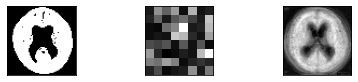

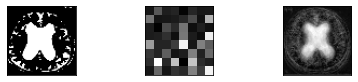

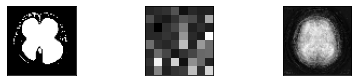

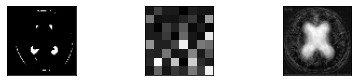

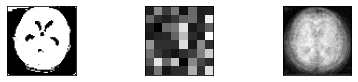

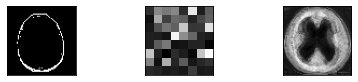

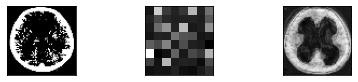

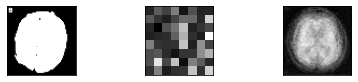

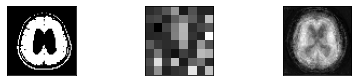

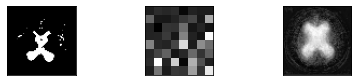

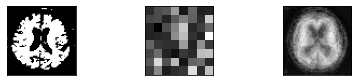

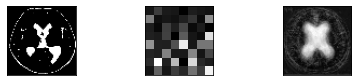

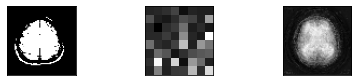

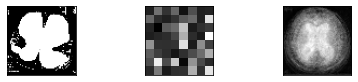

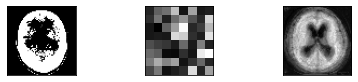

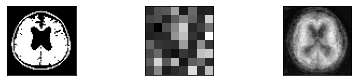

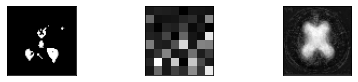

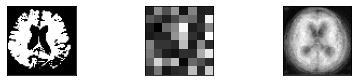

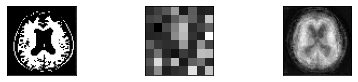

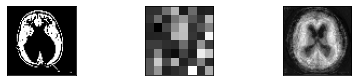

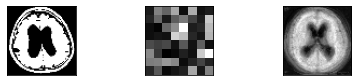

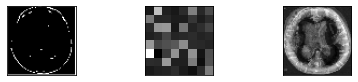

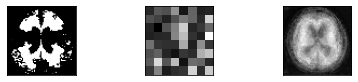

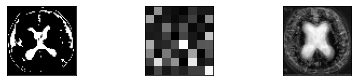

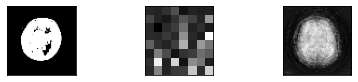

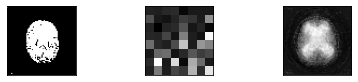

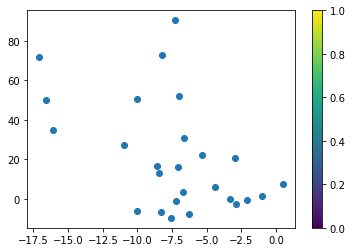

In [71]:
num_images_to_show=-1
table=performance_monitor(num_images_to_show)


In [72]:
liOfCR=table['compression ratio'].tolist()
avg_CR=sum(liOfCR)/len(liOfCR)
print("Average Compression Ratio is",avg_CR)
print("Minimum Compression Ratio is",min(liOfCR))
print("Maximum Compression Ratio is",max(liOfCR))
table.head(num_images_to_show)


Average Compression Ratio is 8.402384615384616
Minimum Compression Ratio is 4.606
Maximum Compression Ratio is 10.968


,encoded image size (bits),original image size (bits),compression ratio,BPP,space saving,MSE,SSIM,PSNR,PRD,SC,CC
Id,,,,,,,,,,,
19,3072,27856,9.068,384.0,0.89,5567.199,0.276,10.674,2.891,0.000,0.0004
6,3040,31184,10.258,380.0,0.90,6222.980,0.164,10.191,1.196,0.001,0.0006
11,3056,22360,7.317,382.0,0.86,4255.314,0.155,11.841,6.152,0.000,0.0007
15,2824,14856,5.261,353.0,0.81,1372.387,0.281,16.756,2.185,0.016,0.0006
10,3088,27464,8.894,386.0,0.89,8423.254,0.148,8.876,11.125,0.000,0.0003
21,2824,16872,5.975,353.0,0.83,2620.615,0.192,13.947,4.667,0.002,0.0005
9,3040,32920,10.829,380.0,0.91,7859.214,0.206,9.177,1.924,0.001,0.0005
26,3088,18952,6.137,386.0,0.84,4624.196,0.195,11.480,12.910,0.000,0.0004
5,3032,28040,9.248,379.0,0.89,7808.972,0.163,9.205,10.087,0.000,0.0005


In [26]:
# !explorer .


<h4 style="text-align:right;">Developed by: Tirtharaj Sinha</h4>
<h5 style="text-align:right;">github repository : <a href="https://github.com/tirtharajsinha/Autoencoder_for_image_compression">@tirtharajsinha/Autoencoder_for_image_compression</a></h5>